### 3. Data acquisition
#### A. Weather Data
This data was acquired from the [following source](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/kernels).

It contemplates the weather features for the whole of Australia, from 01/11/2007 to 25/06/2017.

One thing that should be clarified, There are mre weather stations around Australia and in NSW, but we need to purchase this data from BOM. It will be a significant amount of data, givent the length of time and number of stations.

Importing librearies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box, Point, LineString, Polygon

%matplotlib inline

import datetime

In [24]:
weather = pd.read_csv('./data/weather/weatherAUS.csv')
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [35]:
weather.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 139229 entries, 0 to 142192
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   date           139229 non-null  object  
 1   location       139229 non-null  object  
 2   mintemp        138593 non-null  float64 
 3   maxtemp        138907 non-null  float64 
 4   rainfall       137843 non-null  float64 
 5   evaporation    78594 non-null   float64 
 6   sunshine       71807 non-null   float64 
 7   windgustdir    129942 non-null  object  
 8   windgustspeed  130001 non-null  float64 
 9   winddir9am     129247 non-null  object  
 10  winddir3pm     135456 non-null  object  
 11  windspeed9am   137889 non-null  float64 
 12  windspeed3pm   136601 non-null  float64 
 13  humidity9am    137460 non-null  float64 
 14  humidity3pm    135621 non-null  float64 
 15  pressure9am    125223 non-null  float64 
 16  pressure3pm    125250 non-null  float64 
 17  cl

In [36]:
weather.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,risk_mm,latitude,longitude,elevation
count,138593.000000,138907.000000,137843.000000,78594.000000,71807.000000,130001.000000,137889.000000,136601.000000,137460.000000,135621.000000,125223.000000,125250.000000,85633.000000,82193.000000,138330.000000,136505.000000,139229.000000,139229.000000,139229.000000,139229.000000
mean,12.086911,23.257384,2.333153,5.495486,7.646438,39.924601,13.869794,18.566994,68.801484,51.125342,1017.654287,1015.243320,4.418250,4.491185,16.928516,21.714382,2.344354,-32.822856,141.537522,166.533984
std,6.422057,7.179200,8.435788,4.229994,3.788760,13.609877,8.872858,8.825483,19.168658,20.806570,7.138844,7.070974,2.899539,2.729708,6.537684,6.998846,8.449771,6.080254,11.602392,291.947548
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,982.000000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,-42.890000,115.090000,3.000000
25%,7.500000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,36.000000,1012.900000,1010.400000,1.000000,2.000000,12.200000,16.500000,0.000000,-36.080000,138.600000,15.000000
50%,11.800000,22.700000,0.000000,4.800000,8.500000,39.000000,13.000000,17.000000,70.000000,51.000000,1017.600000,1015.200000,5.000000,5.000000,16.600000,21.100000,0.000000,-34.010000,145.750000,50.000000
75%,16.700000,28.400000,0.600000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.600000,0.600000,-31.660000,150.680000,170.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,-12.420000,153.400000,1762.000000


#### Checking basic points on the data set

1. <a href='#Position_of_measurements'>Position of measurements</a> (location of weather stations)
2. <a href='#Null_values'>Null values</a> 
3. <a href='#Redundant_information'>Redundant information</a> 
4. <a href='#Restricting_to_NSW'>Restricting to NSW</a> 

<a id='Position_of_measurements'></a>

#### 1. Position of measurements
Checking the position fo the stations on a map

The dataset does not have the position for the stations, we will have to find them on BOM's website and hard code it. Unfortunatelly this is the fastes/cheapest way to get the information in the DS.



In [25]:
# Changing the column names to lowercase
weather.columns = [columns.lower() for columns in weather.columns]

# Creating zeroed columns # This takes a bit to run
weather['latitude'] = 0
weather['longitude'] = 0
weather['elevation'] = 0
# Albury
weather.loc[weather['location'] == 'Albury', 'latitude'] = -36.08
weather.loc[weather['location'] == 'Albury', 'longitude'] = 146.95
weather.loc[weather['location'] == 'Albury', 'elevation'] = 150
# BadgerysCreek
weather.loc[weather['location'] == 'BadgerysCreek', 'latitude'] = -33.88
weather.loc[weather['location'] == 'BadgerysCreek', 'longitude'] = 150.76
weather.loc[weather['location'] == 'BadgerysCreek', 'elevation'] = 80
# Cobar
weather.loc[weather['location'] == 'Cobar', 'latitude'] = -31.49
weather.loc[weather['location'] == 'Cobar', 'longitude'] = 145.83
weather.loc[weather['location'] == 'Cobar', 'elevation'] = 260
# CoffsHarbour
weather.loc[weather['location'] == 'CoffsHarbour', 'latitude'] = -30.31
weather.loc[weather['location'] == 'CoffsHarbour', 'longitude'] = 153.12
weather.loc[weather['location'] == 'CoffsHarbour', 'elevation'] = 5
# Moree
weather.loc[weather['location'] == 'Moree', 'latitude'] = -29.48
weather.loc[weather['location'] == 'Moree', 'longitude'] = 149.84
weather.loc[weather['location'] == 'Moree', 'elevation'] = 212
# Newcastle
weather.loc[weather['location'] == 'Newcastle', 'latitude'] = -32.80
weather.loc[weather['location'] == 'Newcastle', 'longitude'] = 151.83
weather.loc[weather['location'] == 'Newcastle', 'elevation'] = 9
# NorahHead
weather.loc[weather['location'] == 'NorahHead', 'latitude'] = -33.16
weather.loc[weather['location'] == 'NorahHead', 'longitude'] = 151.34
weather.loc[weather['location'] == 'NorahHead', 'elevation'] = 46
# Penrith
weather.loc[weather['location'] == 'Penrith', 'latitude'] = -33.75
weather.loc[weather['location'] == 'Penrith', 'longitude'] = 150.68
weather.loc[weather['location'] == 'Penrith', 'elevation'] = 31
# Richmond
weather.loc[weather['location'] == 'Richmond', 'latitude'] = -33.60
weather.loc[weather['location'] == 'Richmond', 'longitude'] = 150.78
weather.loc[weather['location'] == 'Richmond', 'elevation'] = 19
# Sydney
weather.loc[weather['location'] == 'Sydney', 'latitude'] = -33.86
weather.loc[weather['location'] == 'Sydney', 'longitude'] = 151.21
weather.loc[weather['location'] == 'Sydney', 'elevation'] = 39
# SydneyAirport
weather.loc[weather['location'] == 'SydneyAirport', 'latitude'] = -33.93
weather.loc[weather['location'] == 'SydneyAirport', 'longitude'] = 151.17
weather.loc[weather['location'] == 'SydneyAirport', 'elevation'] = 9
# WaggaWagga
weather.loc[weather['location'] == 'WaggaWagga', 'latitude'] = -35.16
weather.loc[weather['location'] == 'WaggaWagga', 'longitude'] = 147.46
weather.loc[weather['location'] == 'WaggaWagga', 'elevation'] = 212
# Williamtown
weather.loc[weather['location'] == 'Williamtown', 'latitude'] = -32.79
weather.loc[weather['location'] == 'Williamtown', 'longitude'] = 151.84
weather.loc[weather['location'] == 'Williamtown', 'elevation'] = 9
# Wollongong
weather.loc[weather['location'] == 'Wollongong', 'latitude'] = -34.42
weather.loc[weather['location'] == 'Wollongong', 'longitude'] = 150.89
weather.loc[weather['location'] == 'Wollongong', 'elevation'] = 5
# Canberra
weather.loc[weather['location'] == 'Canberra', 'latitude'] = -35.30
weather.loc[weather['location'] == 'Canberra', 'longitude'] = 149.20
weather.loc[weather['location'] == 'Canberra', 'elevation'] = 578
# Tuggeranong
weather.loc[weather['location'] == 'Tuggeranong', 'latitude'] = -35.42
weather.loc[weather['location'] == 'Tuggeranong', 'longitude'] = 149.08
weather.loc[weather['location'] == 'Tuggeranong', 'elevation'] = 578
# MountGinini
weather.loc[weather['location'] == 'MountGinini', 'latitude'] = -35.52
weather.loc[weather['location'] == 'MountGinini', 'longitude'] = 148.77
weather.loc[weather['location'] == 'MountGinini', 'elevation'] = 1762
# Ballarat
weather.loc[weather['location'] == 'Ballarat', 'latitude'] = -37.56
weather.loc[weather['location'] == 'Ballarat', 'longitude'] = 143.85
weather.loc[weather['location'] == 'Ballarat', 'elevation'] = 435
# Bendigo
weather.loc[weather['location'] == 'Bendigo', 'latitude'] = -36.75
weather.loc[weather['location'] == 'Bendigo', 'longitude'] = 144.27
weather.loc[weather['location'] == 'Bendigo', 'elevation'] = 435
# Sale
weather.loc[weather['location'] == 'Sale', 'latitude'] = -38.11
weather.loc[weather['location'] == 'Sale', 'longitude'] = 147.13
weather.loc[weather['location'] == 'Sale', 'elevation'] = 4
# MelbourneAirport
weather.loc[weather['location'] == 'MelbourneAirport', 'latitude'] = -37.66
weather.loc[weather['location'] == 'MelbourneAirport', 'longitude'] = 144.84
weather.loc[weather['location'] == 'MelbourneAirport', 'elevation'] = 132
# Melbourne
weather.loc[weather['location'] == 'Melbourne', 'latitude'] = -37.81
weather.loc[weather['location'] == 'Melbourne', 'longitude'] = 144.97
weather.loc[weather['location'] == 'Melbourne', 'elevation'] = 31
# Mildura
weather.loc[weather['location'] == 'Mildura', 'latitude'] = -34.23
weather.loc[weather['location'] == 'Mildura', 'longitude'] = 142.08
weather.loc[weather['location'] == 'Mildura', 'elevation'] = 50
# Nhil
weather.loc[weather['location'] == 'Nhil', 'latitude'] = -36.34
weather.loc[weather['location'] == 'Nhil', 'longitude'] = 141.64
weather.loc[weather['location'] == 'Nhil', 'elevation'] = 133
# Portland
weather.loc[weather['location'] == 'Portland', 'latitude'] = -38.36
weather.loc[weather['location'] == 'Portland', 'longitude'] = 141.60
weather.loc[weather['location'] == 'Portland', 'elevation'] = 8
# Watsonia
weather.loc[weather['location'] == 'Watsonia', 'latitude'] = -37.70
weather.loc[weather['location'] == 'Watsonia', 'longitude'] = 145.08
weather.loc[weather['location'] == 'Watsonia', 'elevation'] = 113
# Dartmoor
weather.loc[weather['location'] == 'Dartmoor', 'latitude'] = -37.91
weather.loc[weather['location'] == 'Dartmoor', 'longitude'] = 141.27
weather.loc[weather['location'] == 'Dartmoor', 'elevation'] = 40
# Brisbane
weather.loc[weather['location'] == 'Brisbane', 'latitude'] = -27.42
weather.loc[weather['location'] == 'Brisbane', 'longitude'] = 153.11
weather.loc[weather['location'] == 'Brisbane', 'elevation'] = 4
# Cairns
weather.loc[weather['location'] == 'Cairns', 'latitude'] = -16.87
weather.loc[weather['location'] == 'Cairns', 'longitude'] = 145.75
weather.loc[weather['location'] == 'Cairns', 'elevation'] = 3
# GoldCoast
weather.loc[weather['location'] == 'GoldCoast', 'latitude'] = -28.01
weather.loc[weather['location'] == 'GoldCoast', 'longitude'] = 153.40
weather.loc[weather['location'] == 'GoldCoast', 'elevation'] = 13
# Townsville
weather.loc[weather['location'] == 'Townsville', 'latitude'] = -19.25
weather.loc[weather['location'] == 'Townsville', 'longitude'] = 146.77
weather.loc[weather['location'] == 'Townsville', 'elevation'] = 7
# Adelaide
weather.loc[weather['location'] == 'Adelaide', 'latitude'] = -34.92
weather.loc[weather['location'] == 'Adelaide', 'longitude'] = 138.60
weather.loc[weather['location'] == 'Adelaide', 'elevation'] = 50
# MountGambier
weather.loc[weather['location'] == 'MountGambier', 'latitude'] = -37.75
weather.loc[weather['location'] == 'MountGambier', 'longitude'] = 140.79
weather.loc[weather['location'] == 'MountGambier', 'elevation'] = 63
# Nuriootpa
weather.loc[weather['location'] == 'Nuriootpa', 'latitude'] = -34.48
weather.loc[weather['location'] == 'Nuriootpa', 'longitude'] = 138.99
weather.loc[weather['location'] == 'Nuriootpa', 'elevation'] = 274
# Woomera
weather.loc[weather['location'] == 'Woomera', 'latitude'] = -31.16
weather.loc[weather['location'] == 'Woomera', 'longitude'] = 136.80
weather.loc[weather['location'] == 'Woomera', 'elevation'] = 166
# Albany
weather.loc[weather['location'] == 'Albany', 'latitude'] = -34.94
weather.loc[weather['location'] == 'Albany', 'longitude'] = 117.80
weather.loc[weather['location'] == 'Albany', 'elevation'] = 68
# Witchcliffe
weather.loc[weather['location'] == 'Witchcliffe', 'latitude'] = -34.01
weather.loc[weather['location'] == 'Witchcliffe', 'longitude'] = 115.09
weather.loc[weather['location'] == 'Witchcliffe', 'elevation'] = 89
# PearceRAAF
weather.loc[weather['location'] == 'PearceRAAF', 'latitude'] = -31.66
weather.loc[weather['location'] == 'PearceRAAF', 'longitude'] = 116.02
weather.loc[weather['location'] == 'PearceRAAF', 'elevation'] = 49
# PerthAirport
weather.loc[weather['location'] == 'PerthAirport', 'latitude'] = -31.93
weather.loc[weather['location'] == 'PerthAirport', 'longitude'] = 115.98
weather.loc[weather['location'] == 'PerthAirport', 'elevation'] = 15
# Perth
weather.loc[weather['location'] == 'Perth', 'latitude'] = -31.93
weather.loc[weather['location'] == 'Perth', 'longitude'] = 115.85
weather.loc[weather['location'] == 'Perth', 'elevation'] = 30
# SalmonGums
weather.loc[weather['location'] == 'SalmonGums', 'latitude'] = -32.98
weather.loc[weather['location'] == 'SalmonGums', 'longitude'] = 121.64
weather.loc[weather['location'] == 'SalmonGums', 'elevation'] = 249
# Walpole
weather.loc[weather['location'] == 'Walpole', 'latitude'] = -34.97
weather.loc[weather['location'] == 'Walpole', 'longitude'] = 116.73
weather.loc[weather['location'] == 'Walpole', 'elevation'] = 16
# Hobart
weather.loc[weather['location'] == 'Hobart', 'latitude'] = -42.89
weather.loc[weather['location'] == 'Hobart', 'longitude'] = 147.33
weather.loc[weather['location'] == 'Hobart', 'elevation'] = 50
# Launceston
weather.loc[weather['location'] == 'Launceston', 'latitude'] = -41.54
weather.loc[weather['location'] == 'Launceston', 'longitude'] = 147.20
weather.loc[weather['location'] == 'Launceston', 'elevation'] = 170
# AliceSprings
weather.loc[weather['location'] == 'AliceSprings', 'latitude'] = -23.80
weather.loc[weather['location'] == 'AliceSprings', 'longitude'] = 133.89
weather.loc[weather['location'] == 'AliceSprings', 'elevation'] = 546
# Darwin
weather.loc[weather['location'] == 'Darwin', 'latitude'] = -12.42
weather.loc[weather['location'] == 'Darwin', 'longitude'] = 130.88
weather.loc[weather['location'] == 'Darwin', 'elevation'] = 30
# Katherine
weather.loc[weather['location'] == 'Katherine', 'latitude'] = -14.45
weather.loc[weather['location'] == 'Katherine', 'longitude'] = 132.27
weather.loc[weather['location'] == 'Katherine', 'elevation'] = 108
# Uluru
weather.loc[weather['location'] == 'Uluru', 'latitude'] = -25.34
weather.loc[weather['location'] == 'Uluru', 'longitude'] = 131.03
weather.loc[weather['location'] == 'Uluru', 'elevation'] = 863   
# Dropping Norsfolk Island
weather = weather.drop(list(weather.loc[weather.latitude ==0].index))

In [26]:
# Creating a column for geometry and appending points for each.
weather['geometry'] = [Point(row.longitude, row.latitude) for index, row in weather.iterrows()]
# turning the pandas DF to a geopandas DF
from geopandas import GeoDataFrame
# Specifying the Coordinate Reference System
crs = {'init':'epsg:4283'}
# Making new GDF and dropping, latitude, longitude and date(the info for date is on the other columns already)
weather = GeoDataFrame(weather, crs=crs, geometry=weather.geometry)

C:\Users\julio\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


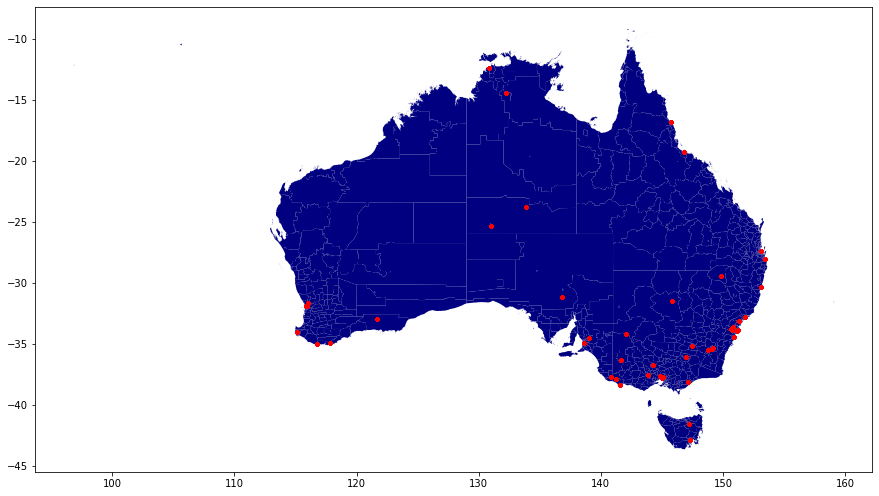

In [29]:
# importing a map os Australia
australia = gpd.read_file('./data/map/australia/SLA11aAust.shp')
# Creating figure to plot
fig, ax = plt.subplots(figsize=(15,15))
# Plot the country borders
australia.plot(ax=ax, color='navy')
# Plot the individual points
weather['geometry'].plot(ax=ax, color='red',  markersize=10)

<a id='Null_values'></a> 

#### 2. Null values
Checking for null values

In [30]:
# Getting null values in categorical
for i in weather:
    print(i, weather[i].isnull().sum())

date 0
location 0
mintemp 636
maxtemp 322
rainfall 1386
evaporation 60635
sunshine 67422
windgustdir 9287
windgustspeed 9228
winddir9am 9982
winddir3pm 3773
windspeed9am 1340
windspeed3pm 2628
humidity9am 1769
humidity3pm 3608
pressure9am 14006
pressure3pm 13979
cloud9am 53596
cloud3pm 57036
temp9am 899
temp3pm 2724
raintoday 1386
risk_mm 0
raintomorrow 0
latitude 0
longitude 0
elevation 0
geometry 0


We should consider that the missing values in specific mesurements are actually stations that do not have specific equipment.

<a id='Redundant_information'></a> 

#### 3. Redundant information
Let's check what is redundant in the DS and drop it before creating a clean DF and saving it.



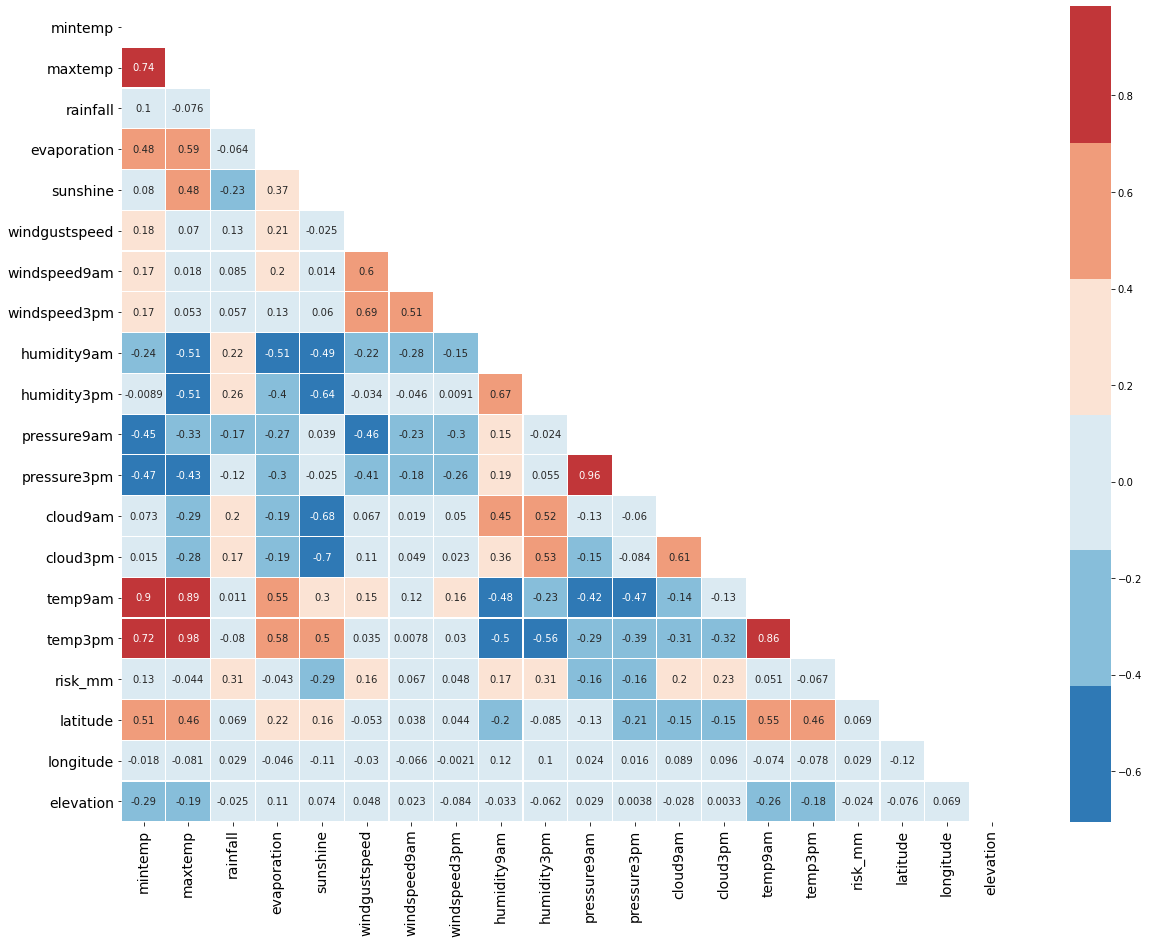

In [33]:
# Creating Correlation matrix
corrs = weather.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(20,15))

# choosing color palette
c_palette = sns.color_palette('RdBu_r')

# enerate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask, annot=True,fmt='.2g', annot_kws={'fontsize':10},linewidths=.2,cmap=c_palette)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

The heatmap above shows that there is high correlation between a number of variables.

One important point to make before finalizing with this DS cleaning is that the `raintoday` and `raintomorrow` refer to the original use of this data. This DS was originally created to forecast rain on the subsequent day. We will take out the `raintomorrow` and `risk_mm` columns as they have the same information as `raintoday`.

In [34]:
weather.drop(['raintomorrow','risk_mm'], axis=1)

<a id='Restricting_to_NSW'></a> 

#### 4. Restricting to NSW
Restricting only to the weather stations located in NSW

In [38]:
# loading in the state poligon
nsw = gpd.read_file('./data/map/NSW/state/NSW_STATE_POLYGON_shp.shp')
nsw

,ST_PLY_PID,DT_CREATE,DT_RETIRE,STATE_PID,NSW_STATE_,NSW_STAT_1,NSW_STAT_2,NSW_STAT_3,geometry
0,12384,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((150.07240 -36.46528, 150.07238 -36.4..."
1,12385,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((152.56741 -32.22442, 152.56759 -32.2..."
2,12386,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((153.08446 -30.89781, 153.08453 -30.8..."
3,12387,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((150.14784 -36.23360, 150.14786 -36.2..."
4,12388,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((150.07268 -36.46063, 150.07272 -36.4..."
...,...,...,...,...,...,...,...,...,...
314,12620,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((152.54456 -32.34899, 152.54471 -32.3..."
315,12621,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((153.15369 -30.24243, 153.15371 -30.2..."
316,12622,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((150.14291 -36.27146, 150.14295 -36.2..."
317,12623,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((152.14634 -32.76551, 152.14644 -32.7..."


C:\Users\julio\anaconda3\envs\geo_env\lib\site-packages\geopandas\tools\sjoin.py:58: UserWarning: CRS of frames being joined does not match!(+init=epsg:4283 +type=crs != epsg:4283)
  warn(


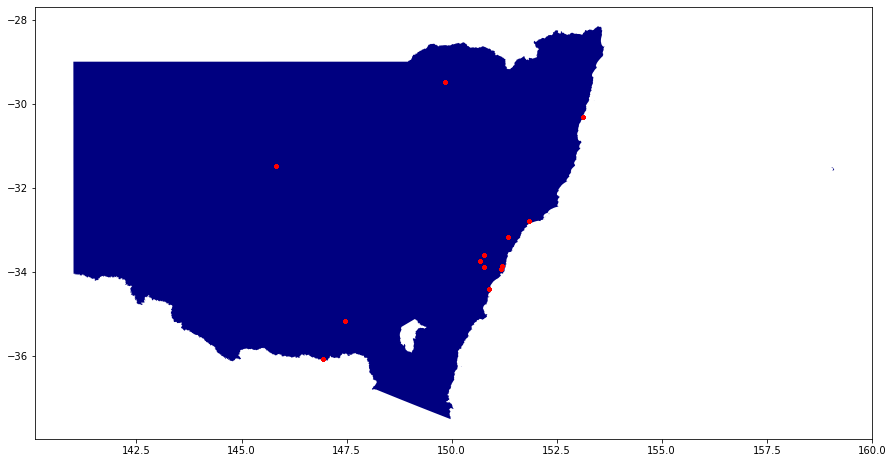

In [43]:
# Making the spatial join
joined_inner = gpd.sjoin(weather, nsw, op='within', how='inner')
# Creating an individual DS with the desired info
weather_nsw = joined_inner[['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'risk_mm', 'raintomorrow', 'latitude',
       'longitude', 'elevation', 'geometry']]

# Checking if we have only the stations in NSW
# Creating figure to plot
fig, ax = plt.subplots(figsize=(15,15))
# Plot the country borders
nsw.plot(ax=ax, color='navy')
# Plot the individual points
weather_nsw['geometry'].plot(ax=ax, color='red',  markersize=10)

In [44]:
# Saving to file
weather_nsw.to_file('./data/processed/weather/clean_weather.shp')